In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import params as my

In [2]:
data = pd.read_csv('data.csv')

In [103]:
vtx = data['# vtx with two tracks of opposite curvature'].to_numpy()
x = data['XV (cm)'].to_numpy()
y = data['YV(cm)'].to_numpy()
z = data['ZV(cm)'].to_numpy()
px1 = data['Track1 PX(MeV) '].to_numpy()
py1 = data['Track1 PY(MeV) '].to_numpy()
pz1 = data['Track1 PZ(MeV) '].to_numpy()
px2 = data['Track2 PX(MeV) '].to_numpy()
py2 = data['Track2 PY(MeV) '].to_numpy()
pz2 = data['Track2 PZ(MeV) '].to_numpy()

In [104]:
N_phi = my.luminosity * my.sigma_ee_phi
N_KLKS = N_phi * my.BR_phi_KK * my.BR_KS_2pi
print(f"Number of produced KL/KS pairs = {int(N_KLKS)}")

N_KL_measured = N_KLKS * my.BR_KL_2pi * my.acceptance * my.epsL * my.epsS
print(f"Expected detected KL = {int(N_KL_measured)}")

Number of produced KL/KS pairs = 140760
Expected detected KL = 24


In [105]:
# Define some useful quantities
radius = np.sqrt(x*x + y*y + z*z)

mass_array = np.repeat(my.m_pi, len(data))
E1 = my.getE(mass_array, px1, py1, pz1)
E2 = my.getE(mass_array, px2, py2, pz2)
inv_mass = my.invmass(E1+E2, px1+px2, py1+py2, pz1+pz2)

p_array = np.repeat(my.p_K0, len(data))
p_tot = my.norm(px1+px2, py1+py2, pz1+pz2)

mass_K_array = np.repeat(my.m_K0, len(data))
pKx, pKy, pKz = my.getComponents(p_array, x, y, z)
E_K = my.getE(mass_K_array, pKx, pKy, pKz)

delta_px = pKx - px1 - px2
delta_py = pKy - py1 - py2
delta_pz = pKz - pz1 - pz2

missing_p = my.norm(pKx-px1-px2, pKy-py1-py2, pKz-pz1-pz2)
M2 = (E_K - E1 -E2)**2 - missing_p**2

In [158]:
# Define cuts

cut_r = radius > 4
cut_r_inv = np.invert(cut_r)
cut_FV = (z > -my.zlim) & (z < my.zlim) & (np.sqrt(x*x+y*y) > my.xmin) & (np.sqrt(x*x+y*y) < my.xmax)
cut_m = (inv_mass > my.m_K0 - 5) & (inv_mass < my.m_K0 + 5)
cut_p = (p_tot > my.p_K0 - 20) & (p_tot < my.p_K0 + 20)
cut_M2 = (M2 > -10) & (M2 < 10)

cut_pxpypz = (delta_px > -10) & (delta_px < 10) & (delta_py > -10) & (delta_py < 10) & (delta_pz > -10) & (delta_pz < 10)

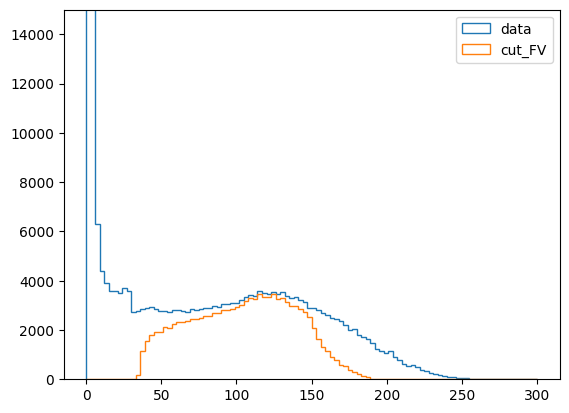

In [159]:
nbins = 100
lims = (0, 300)

plt.hist(radius, histtype = 'step', bins = nbins, range = lims, label = 'data')
plt.hist(radius[cut_FV], histtype = 'step', bins = nbins, range = lims, label = 'cut_FV')


#plt.vlines(np.sqrt(my.xmin**2 + my.ymin**2), 0, 20000, 'r', linestyle = '--', label = 'FV minimum radius', alpha = 0.5)
plt.ylim(0, 15000)

plt.legend();

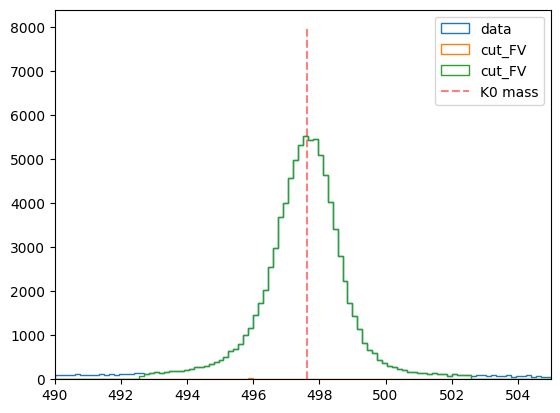

In [160]:
lims = (490, 505)

plt.hist(inv_mass, histtype = 'step', bins = nbins, range = lims, label = 'data')
plt.hist(inv_mass[cut_FV], histtype = 'step', bins = nbins, range = lims, label = 'cut_FV')
plt.hist(inv_mass[cut_m], histtype = 'step', bins = nbins, range = lims, label = 'cut_FV')

plt.vlines(my.m_K0, 0, 8000, 'r', linestyle = 'dashed', label = 'K0 mass', alpha = 0.5)
plt.xlim(lims)
plt.legend();

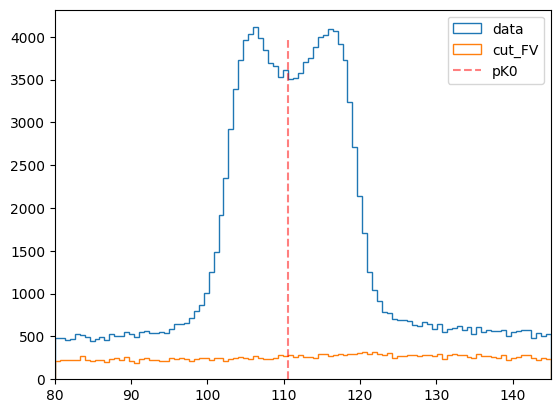

In [161]:
bins = 100
lims = (80,145)

plt.hist(p_tot, histtype = 'step', bins = bins, range = lims, label = 'data')
plt.hist(p_tot[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')

plt.vlines(my.p_K0, 0, 4000, 'r', linestyle = 'dashed', label = 'pK0', alpha = 0.5)
plt.xlim(lims)
plt.legend();

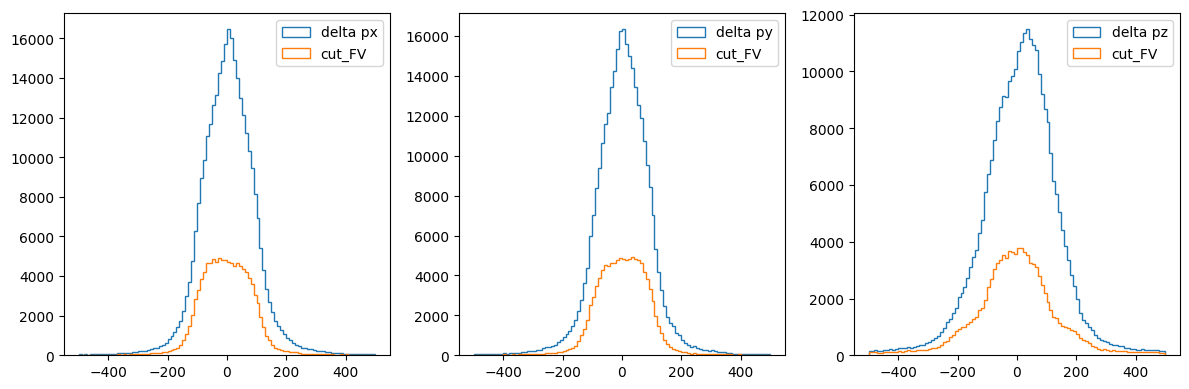

In [162]:
plt.figure(figsize = (12,4))

bins = 100
lims = (-500,500)

plt.subplot(131)


plt.hist(delta_px, histtype = 'step', bins = bins, range = lims,label = 'delta px')
plt.hist(delta_px[cut_FV], histtype = 'step', bins = bins, range = lims,label = 'cut_FV')
plt.legend()

plt.subplot(132)


plt.hist(delta_py, histtype = 'step', bins = bins, range = lims,label = 'delta py')
plt.hist(delta_py[cut_FV], histtype = 'step', bins = bins, range = lims,label = 'cut_FV')
plt.legend()

plt.subplot(133)

plt.hist(delta_pz, histtype = 'step', bins = bins, range = lims, label = 'delta pz')
plt.hist(delta_pz[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')
plt.legend()

plt.tight_layout();

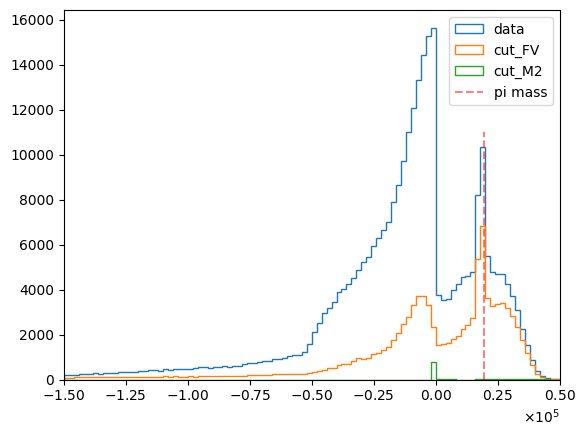

In [163]:
lims = (-150000,50000)

plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3), useMathText = True)
plt.hist(M2, histtype = 'step', bins = bins, range = lims, label = 'data');
plt.hist(M2[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')
plt.hist(M2[cut_pxpypz], histtype = 'step', bins = bins, range = lims, label = 'cut_M2')
plt.vlines(my.m_pi**2, 0, 11000, 'r', linestyle = 'dashed', label = 'pi mass', alpha = 0.5)
plt.legend()
plt.xlim(lims);

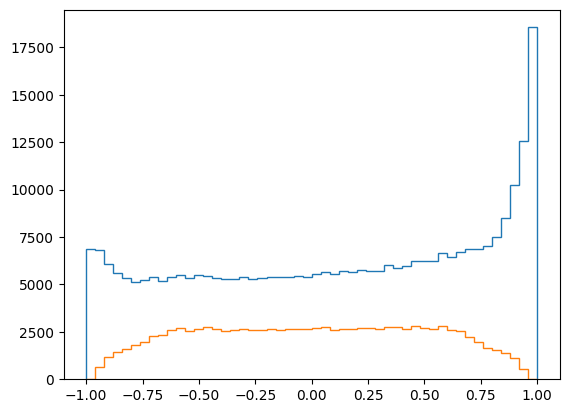

In [164]:
theta = my.getTheta(x,y,z)

bins = 50

n, bins, _ = plt.hist(np.cos(theta), histtype = 'step', bins = bins);
plt.hist(np.cos(theta[cut_FV]), histtype = 'step', bins = bins);

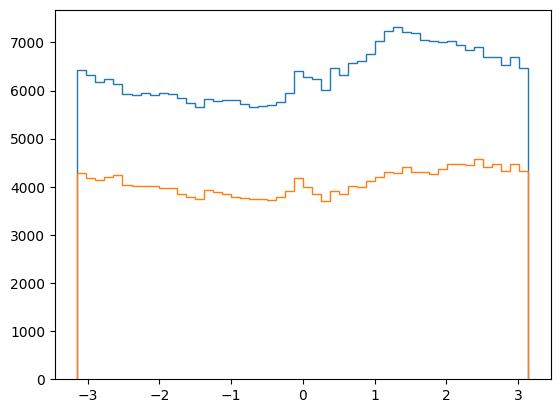

In [165]:
phi = my.getPhi(x,y,z)

bins = 50

plt.hist(phi, histtype = 'step', bins = bins);
plt.hist(phi[cut_r], histtype = 'step', bins = bins);

In [203]:
# Processing
vtx1 = vtx
events = np.where(vtx1 == 1)[0]
ext_events = np.append(events,len(vtx1))

tolerance = np.pi/10


KL = 0
KL_CP = 0


for i, eve in enumerate(events):                                                  # Loop through events
    
    event_length = ext_events[i+1]-ext_events[i]
    print(f'-> Event {i} Index {eve} Length {event_length}')
    
    if event_length == 1:
        if cut_FV[j+eve] == True:                                          #  a KL has been detected
            KL += 1
            print('\tFound KL')
            if cut_m[j+eve] & cut_p[j+eve] & cut_pxpypz[j+eve]:            # a CP violating KL has been detected
                KL_CP += 1
                print('\tFound CP violating KL')
        else :                                                             # KS found so a KL must be somewhere
            if cut_m[j+eve] & cut_p[j+eve] :                                          
                KL += 1
                print('\tKL from KS Tag')
    
    
    elif event_length > 1:                                                 # Case with more than 1 vertex
        BTB = 0
        for j in range(0, event_length):
            for k in range(j+1, event_length):
                
                if (-tolerance + np.pi < (theta[j+eve] + theta[k+eve]) < tolerance + np.pi):
                    if (np.pi-tolerance < abs(phi[k+eve] - phi[j+eve]) < np.pi+tolerance):
                        if (radius[k+eve] <= radius[j+eve]):
                            # KL was found and tagged
                            KL += 1
                            BTB += 1
                            print(f'\t{k+eve} is a KS, {j+eve} is a KL')
                            if cut_FV[j+eve] & cut_m[j+eve] & cut_p[j+eve] & cut_pxpypz[j+eve]:
                                # CP violating KL
                                KL_CP += 1
                                print(f'\t{j+eve} is a CP violating KL')
                        elif (radius[k+eve] > radius[j+eve]):
                            KL += 1
                            BTB += 1
                            print(f'\t{j+eve} is a KS, {k+eve} is a KL')
                            if cut_FV[k+eve] & cut_m[k+eve] & cut_p[k+eve] & cut_pxpypz[j+eve]:
                                # CP violating KL
                                KL_CP += 1
                                print(f'\t{k+eve} is a CP violating KL')
                else:
                    print(f'\tNo Kaon to Tag {j+eve}, {k+eve}')
        
        
        if BTB == 0:
            for j in range(0, event_length):
                if cut_FV[j+eve] == True:                                          #  a KL has been detected
                    KL += 1
                    print(f'\tFound KL {j+eve}')
                    if cut_m[j+eve] & cut_p[j+eve] & cut_pxpypz[j+eve]:            # a CP violating KL has been detected
                        KL_CP += 1
                        print(f'\tFound CP violating KL {j+eve}')
                else :                                                             # KS found so a KL must be somewhere
                    if cut_m[j+eve] & cut_p[j+eve] & cut_pxpypz[j+eve]:                                          
                        KL += 1
                        print(f'\tKL from KS Tag {j+eve}')
                        break

-> Event 0 Index 0 Length 1
	KL from KS Tag
-> Event 1 Index 1 Length 1
-> Event 2 Index 2 Length 1
	KL from KS Tag
-> Event 3 Index 3 Length 1
-> Event 4 Index 4 Length 1
-> Event 5 Index 5 Length 1
-> Event 6 Index 6 Length 4
	No Kaon to Tag 6, 8
	6 is a KS, 9 is a KL
	No Kaon to Tag 7, 9
	No Kaon to Tag 8, 9
-> Event 7 Index 10 Length 1
	Found KL
-> Event 8 Index 11 Length 1
	KL from KS Tag
-> Event 9 Index 12 Length 2
	12 is a KS, 13 is a KL
-> Event 10 Index 14 Length 1
-> Event 11 Index 15 Length 3
	No Kaon to Tag 15, 16
	No Kaon to Tag 15, 17
	No Kaon to Tag 16, 17
-> Event 12 Index 18 Length 1
-> Event 13 Index 19 Length 2
	No Kaon to Tag 19, 20
-> Event 14 Index 21 Length 1
	Found KL
-> Event 15 Index 22 Length 2
	No Kaon to Tag 22, 23
-> Event 16 Index 24 Length 1
-> Event 17 Index 25 Length 1
	KL from KS Tag
-> Event 18 Index 26 Length 1
-> Event 19 Index 27 Length 1
-> Event 20 Index 28 Length 2
-> Event 21 Index 30 Length 1
	KL from KS Tag
-> Event 22 Index 31 Length 1
-> 

	No Kaon to Tag 13325, 13326
-> Event 8545 Index 13327 Length 1
-> Event 8546 Index 13328 Length 1
	Found KL
-> Event 8547 Index 13329 Length 3
	No Kaon to Tag 13329, 13330
	No Kaon to Tag 13329, 13331
	No Kaon to Tag 13330, 13331
-> Event 8548 Index 13332 Length 1
-> Event 8549 Index 13333 Length 2
	13333 is a KS, 13334 is a KL
-> Event 8550 Index 13335 Length 1
	Found KL
-> Event 8551 Index 13336 Length 1
-> Event 8552 Index 13337 Length 1
	KL from KS Tag
-> Event 8553 Index 13338 Length 1
	KL from KS Tag
-> Event 8554 Index 13339 Length 2
	No Kaon to Tag 13339, 13340
-> Event 8555 Index 13341 Length 1
	KL from KS Tag
-> Event 8556 Index 13342 Length 1
-> Event 8557 Index 13343 Length 3
	No Kaon to Tag 13343, 13345
-> Event 8558 Index 13346 Length 1
-> Event 8559 Index 13347 Length 2
	No Kaon to Tag 13347, 13348
-> Event 8560 Index 13349 Length 3
	No Kaon to Tag 13349, 13350
	No Kaon to Tag 13349, 13351
-> Event 8561 Index 13352 Length 1
	KL from KS Tag
-> Event 8562 Index 13353 Leng

-> Event 19449 Index 30524 Length 1
	Found KL
-> Event 19450 Index 30525 Length 2
-> Event 19451 Index 30527 Length 2
	No Kaon to Tag 30527, 30528
-> Event 19452 Index 30529 Length 1
	KL from KS Tag
-> Event 19453 Index 30530 Length 1
	Found KL
-> Event 19454 Index 30531 Length 2
-> Event 19455 Index 30533 Length 1
	Found KL
-> Event 19456 Index 30534 Length 5
	No Kaon to Tag 30534, 30535
	No Kaon to Tag 30534, 30536
	No Kaon to Tag 30534, 30537
	No Kaon to Tag 30534, 30538
	No Kaon to Tag 30535, 30536
	No Kaon to Tag 30535, 30537
	No Kaon to Tag 30535, 30538
	No Kaon to Tag 30536, 30537
	No Kaon to Tag 30536, 30538
	No Kaon to Tag 30537, 30538
-> Event 19457 Index 30539 Length 1
	Found KL
-> Event 19458 Index 30540 Length 1
	Found KL
-> Event 19459 Index 30541 Length 1
	Found KL
-> Event 19460 Index 30542 Length 3
	No Kaon to Tag 30542, 30544
-> Event 19461 Index 30545 Length 1
	KL from KS Tag
-> Event 19462 Index 30546 Length 1
-> Event 19463 Index 30547 Length 5
	No Kaon to Tag 3054

	Found KL
-> Event 29730 Index 46773 Length 1
-> Event 29731 Index 46774 Length 1
	KL from KS Tag
-> Event 29732 Index 46775 Length 2
	No Kaon to Tag 46775, 46776
-> Event 29733 Index 46777 Length 4
	No Kaon to Tag 46777, 46778
	No Kaon to Tag 46777, 46779
	No Kaon to Tag 46778, 46780
	No Kaon to Tag 46779, 46780
-> Event 29734 Index 46781 Length 1
-> Event 29735 Index 46782 Length 1
-> Event 29736 Index 46783 Length 1
-> Event 29737 Index 46784 Length 5
	No Kaon to Tag 46784, 46786
	No Kaon to Tag 46784, 46788
	No Kaon to Tag 46785, 46786
	No Kaon to Tag 46785, 46787
	No Kaon to Tag 46785, 46788
	No Kaon to Tag 46786, 46787
	No Kaon to Tag 46786, 46788
	No Kaon to Tag 46787, 46788
-> Event 29738 Index 46789 Length 1
	KL from KS Tag
-> Event 29739 Index 46790 Length 1
	Found KL
-> Event 29740 Index 46791 Length 1
	Found KL
-> Event 29741 Index 46792 Length 1
	KL from KS Tag
-> Event 29742 Index 46793 Length 1
	Found KL
-> Event 29743 Index 46794 Length 2
-> Event 29744 Index 46796 Leng

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



	No Kaon to Tag 210672, 210673
	No Kaon to Tag 210672, 210674
-> Event 133370 Index 210675 Length 1
	Found KL
-> Event 133371 Index 210676 Length 1
	KL from KS Tag
-> Event 133372 Index 210677 Length 1
	KL from KS Tag
-> Event 133373 Index 210678 Length 1
	KL from KS Tag
-> Event 133374 Index 210679 Length 1
	KL from KS Tag
-> Event 133375 Index 210680 Length 1
	Found KL
-> Event 133376 Index 210681 Length 1
	Found KL
-> Event 133377 Index 210682 Length 2
	No Kaon to Tag 210682, 210683
-> Event 133378 Index 210684 Length 2
-> Event 133379 Index 210686 Length 2
	No Kaon to Tag 210686, 210687
-> Event 133380 Index 210688 Length 1
-> Event 133381 Index 210689 Length 3
	No Kaon to Tag 210689, 210691
	No Kaon to Tag 210690, 210691
-> Event 133382 Index 210692 Length 1
	Found KL
-> Event 133383 Index 210693 Length 1
	Found KL
-> Event 133384 Index 210694 Length 6
	No Kaon to Tag 210694, 210696
	No Kaon to Tag 210694, 210698
	No Kaon to Tag 210694, 210699
	No Kaon to Tag 210695, 210696
	No Ka

	No Kaon to Tag 222260, 222262
	No Kaon to Tag 222261, 222262
-> Event 140837 Index 222263 Length 1
	Found KL
-> Event 140838 Index 222264 Length 1
	Found KL
-> Event 140839 Index 222265 Length 1
	KL from KS Tag
-> Event 140840 Index 222266 Length 1
-> Event 140841 Index 222267 Length 1
	KL from KS Tag
-> Event 140842 Index 222268 Length 2
-> Event 140843 Index 222270 Length 1
-> Event 140844 Index 222271 Length 1
	KL from KS Tag
-> Event 140845 Index 222272 Length 1
	Found KL
-> Event 140846 Index 222273 Length 2
-> Event 140847 Index 222275 Length 1
	Found KL
-> Event 140848 Index 222276 Length 2
	No Kaon to Tag 222276, 222277
-> Event 140849 Index 222278 Length 2
	222278 is a KS, 222279 is a KL
-> Event 140850 Index 222280 Length 1
	KL from KS Tag
-> Event 140851 Index 222281 Length 1
-> Event 140852 Index 222282 Length 1
	KL from KS Tag
-> Event 140853 Index 222283 Length 2
	No Kaon to Tag 222283, 222284
-> Event 140854 Index 222285 Length 1
	KL from KS Tag
-> Event 140855 Index 22

-> Event 151076 Index 238340 Length 4
	No Kaon to Tag 238340, 238341
	No Kaon to Tag 238340, 238342
	No Kaon to Tag 238340, 238343
	No Kaon to Tag 238341, 238342
-> Event 151077 Index 238344 Length 1
	Found KL
-> Event 151078 Index 238345 Length 1
	Found KL
-> Event 151079 Index 238346 Length 4
	No Kaon to Tag 238346, 238347
	No Kaon to Tag 238346, 238348
	No Kaon to Tag 238346, 238349
	No Kaon to Tag 238347, 238348
	No Kaon to Tag 238348, 238349
-> Event 151080 Index 238350 Length 1
	Found KL
-> Event 151081 Index 238351 Length 4
-> Event 151082 Index 238355 Length 2
-> Event 151083 Index 238357 Length 1
	KL from KS Tag
-> Event 151084 Index 238358 Length 1
	KL from KS Tag
-> Event 151085 Index 238359 Length 1
	KL from KS Tag
-> Event 151086 Index 238360 Length 1
	KL from KS Tag
-> Event 151087 Index 238361 Length 1
-> Event 151088 Index 238362 Length 1
	KL from KS Tag
-> Event 151089 Index 238363 Length 1
-> Event 151090 Index 238364 Length 3
	No Kaon to Tag 238364, 238365
	No Kaon t

	No Kaon to Tag 252340, 252344
	No Kaon to Tag 252341, 252342
	No Kaon to Tag 252341, 252343
	No Kaon to Tag 252341, 252344
	No Kaon to Tag 252342, 252343
	No Kaon to Tag 252342, 252344
	No Kaon to Tag 252343, 252344
-> Event 159768 Index 252345 Length 1
-> Event 159769 Index 252346 Length 1
	KL from KS Tag
-> Event 159770 Index 252347 Length 1
	KL from KS Tag
-> Event 159771 Index 252348 Length 3
	No Kaon to Tag 252348, 252349
	No Kaon to Tag 252348, 252350
	No Kaon to Tag 252349, 252350
-> Event 159772 Index 252351 Length 1
	KL from KS Tag
-> Event 159773 Index 252352 Length 1
	Found KL
-> Event 159774 Index 252353 Length 1
	Found KL
-> Event 159775 Index 252354 Length 2
-> Event 159776 Index 252356 Length 2
-> Event 159777 Index 252358 Length 2
	No Kaon to Tag 252358, 252359
-> Event 159778 Index 252360 Length 1
	Found KL
-> Event 159779 Index 252361 Length 3
	No Kaon to Tag 252362, 252363
-> Event 159780 Index 252364 Length 1
	KL from KS Tag
-> Event 159781 Index 252365 Length 1
	K

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [204]:
kl = KL
kl

82255

In [205]:
kl_cp = KL_CP
kl_cp

12

In [206]:
print(f'BR = {kl_cp/kl}')

BR = 0.0001458877879764148
